<a href="https://colab.research.google.com/github/IGONZALEZC/IGONZALEZC/blob/main/Tarea_preparar_datos_para_entrenar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

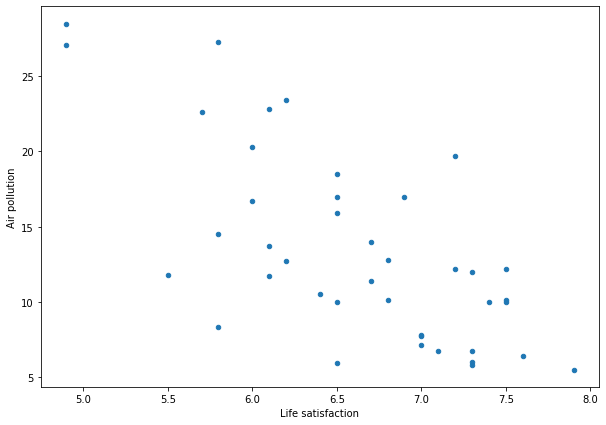

In [ ]:
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/IGONZALEZC/IGONZALEZC/main/oecd_bli_2018.csv', 'oecd_bli_2018.csv')
# @author: ISAAC GONZALEZ CRUZ
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


# Cargando la data data
Air_pollution = pd.read_csv("oecd_bli_2018.csv", thousands=',')
Life_satisfaction = pd.read_csv("oecd_bli_2018.csv",thousands=',')

Air_pollution = Air_pollution[Air_pollution["INEQUALITY"]=="TOT"]
Air_pollution = Air_pollution[Air_pollution["Indicator"]=="Air pollution"]
Air_pollution = Air_pollution.pivot(index="Country", columns="Indicator", values="Value")
Air_pollution.head()

Life_satisfaction = Life_satisfaction[Life_satisfaction["INEQUALITY"]=="TOT"]
Life_satisfaction = Life_satisfaction[Life_satisfaction["Indicator"]=="Life satisfaction"]
Life_satisfaction = Life_satisfaction.pivot(index="Country", columns="Indicator", values="Value")
Life_satisfaction.head()

# Acomoda los datos para preparar el conjunto de entrenamiento
full_country_stats = pd.merge(left=Air_pollution, right=Life_satisfaction, left_index=True, right_index=True)
full_country_stats.sort_values(by="Life satisfaction", inplace=True)
full_country_stats

# Visualizando la data
sample_data = full_country_stats[["Life satisfaction", 'Air pollution']]
sample_data.plot(kind='scatter', x="Life satisfaction", y='Air pollution', figsize=(10,7))
plt.show()

# Seleccionar un modelo lineal
model = sklearn.linear_model.LinearRegression()



# Nueva sección